In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 


In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
x=df.iloc[:,[3,4]].values
#save values of annual income and spending score in the form of array 

In [9]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [18]:
#perform elbow method to find optimal number of clusters 
from sklearn.cluster import KMeans
wcss= []

In [20]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

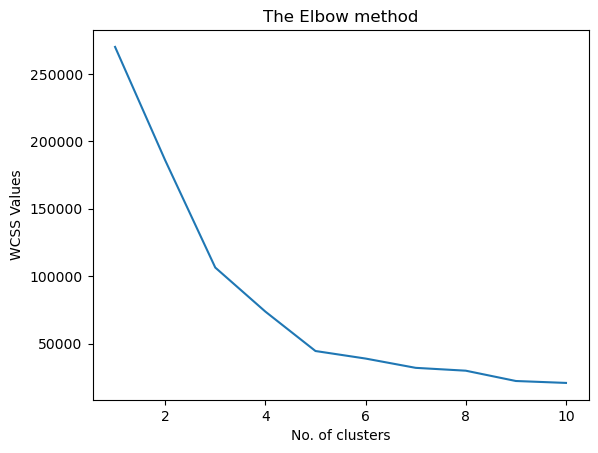

In [22]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS Values')
plt.show()

#### The output graph appears that elbow happens at no. of cliusters 5 so this is the best k

### Step 3: Traning the model usinf unsupervised learning algorithm (K-Means)
- Intializing our K-Means with selected optimal k
- plot ocf clusters, and gain intuitions regaring our customers

In [24]:
Kmeansmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [26]:
y_kmeans=Kmeansmodel.fit_predict(x)


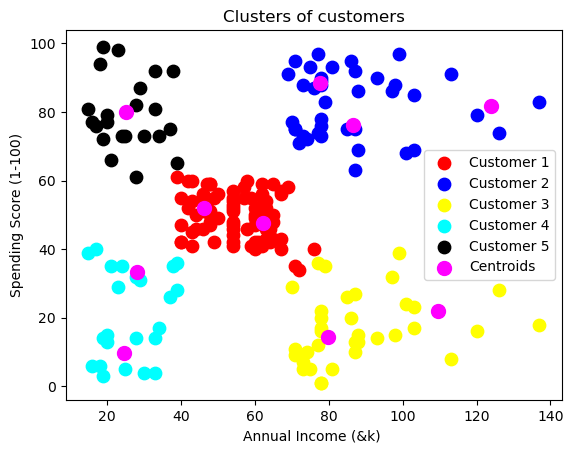

In [28]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=80,c="red",label='Customer 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=80,c="blue",label='Customer 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=80,c="yellow",label='Customer 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=80,c="cyan",label='Customer 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=80,c="black",label='Customer 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='magenta', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel("Annual Income (&k) ")
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


### Some Observations:
- Black cluster represent customers having comperatively less salary but spending is very high 
- on the other side yellow cluster represents Customers with high salary but spending very low
